In [55]:
#Import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns; sns
import numpy as np
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import Imputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine


In [3]:
#Import lin
np.set_printoptions(precision=4)
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os
os.getcwd()

'C:\\Users\\HOME10\\Desktop\\PYTHON'

In [4]:
# Importing Data
Toronto_climate=pd.read_csv("C:/Users/HOME10/Desktop/PYTHON/Toronto_temp.csv")
Toronto_climate.head(50)

,Date/Time,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
0,31-Jan-18,"2,018",1,31,-7.0,2.0,-15.0,0.0,1.0,1.0,Winter
1,30-Jan-18,"2,018",1,30,-11.0,-7.0,-15.0,0.0,0.0,0.0,Winter
2,29-Jan-18,"2,018",1,29,-4.0,-2.0,-7.0,0.0,5.0,5.0,Winter
3,28-Jan-18,"2,018",1,28,1.0,5.0,-3.0,0.0,0.0,0.0,Winter
4,27-Jan-18,"2,018",1,27,5.0,10.0,0.0,2.0,0.0,2.0,Winter
5,26-Jan-18,"2,018",1,26,2.0,6.0,-3.0,0.0,0.0,0.0,Winter
6,25-Jan-18,"2,018",1,25,-7.0,-3.0,-11.0,0.0,0.0,0.0,Winter
7,24-Jan-18,"2,018",1,24,-8.0,-5.0,-11.0,0.0,0.0,0.0,Winter
8,23-Jan-18,"2,018",1,23,1.0,7.0,-5.0,3.0,0.0,3.0,Winter
9,22-Jan-18,"2,018",1,22,2.0,2.0,1.0,14.0,0.0,14.0,Winter


In [5]:
# to get number of miising values
Toronto_climate.isnull().sum()

Date/Time             0
Year                  0
Month                 0
Day                   0
Mean Temp (C)        13
Max Temp (C)         12
Min Temp (C)         12
Total Rain (mm)      26
Total Snow (cm)      18
Total Precip (mm)    24
season                0
dtype: int64

In [6]:
# print the last 20 rows of data
# I did this to check if data has NAN values as first 20 row of data didnt show the NAN
print(Toronto_climate.tail(20))

      Date/Time  Year  Month  Day  Mean Temp (C)  Max Temp (C)  Min Temp (C)  \
2869  01-Dec-56  1956     12    1           -1.2           2.2          -4.5   
2870  01-Dec-55  1955     12    1           -5.5          -1.8          -9.1   
2871  01-Dec-54  1954     12    1           -3.4          -0.1          -6.6   
2872  01-Dec-53  1953     12    1           -0.6           3.0          -4.2   
2873  01-Dec-52  1952     12    1           -0.2           2.9          -3.3   
2874  01-Dec-51  1951     12    1           -3.5           0.8          -7.7   
2875  01-Dec-50  1950     12    1           -3.5           0.0          -6.9   
2876  01-Dec-49  1949     12    1           -1.5           2.4          -5.4   
2877  01-Dec-48  1948     12    1           -1.7           1.8          -5.2   
2878  01-Dec-47  1947     12    1           -4.6          -0.4          -8.7   
2879  01-Dec-46  1946     12    1           -2.6           1.7          -6.9   
2880  01-Dec-45  1945     12    1       

In [7]:
#get the number of varible in each column
Toronto_climate.count()

Date/Time            2889
Year                 2889
Month                2889
Day                  2889
Mean Temp (C)        2876
Max Temp (C)         2877
Min Temp (C)         2877
Total Rain (mm)      2863
Total Snow (cm)      2871
Total Precip (mm)    2865
season               2889
dtype: int64

In [8]:
#Describtive statistics
Toronto_climate.describe()

,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
count,2889.000000,2889.000000,2876.00000,2877.000000,2877.000000,2863.000000,2871.000000,2865.000000
mean,6.615784,11.101419,8.92653,13.672715,4.148766,18.564862,3.411912,21.849494
std,3.403677,9.994065,10.77392,11.472108,10.241629,32.166248,10.033955,34.611454
min,1.000000,1.000000,-22.00000,-19.000000,-26.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.00000,4.000000,-3.400000,0.000000,0.000000,0.000000
50%,7.000000,9.000000,9.40000,14.700000,4.200000,0.000000,0.000000,1.000000
75%,10.000000,20.000000,18.50000,24.000000,13.000000,26.000000,0.000000,37.300000
max,12.000000,31.000000,31.00000,36.000000,25.000000,213.900000,86.600000,213.900000


In [9]:
#get column names
Toronto_climate.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Mean Temp (C)', 'Max Temp (C)',
       'Min Temp (C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'season'],
      dtype='object')

In [10]:
#Rename the date/time column to date
Toronto_climate=Toronto_climate.rename(columns=
              {'Date/Time':
              'Date'})
Toronto_climate.columns

Index(['Date', 'Year', 'Month', 'Day', 'Mean Temp (C)', 'Max Temp (C)',
       'Min Temp (C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'season'],
      dtype='object')

In [11]:
#Removal of , from the values of column Date
Toronto_climate.Date=Toronto_climate.Date.str.replace(',',  '')

In [12]:
#Removal of , from the values of column year
Toronto_climate.Year=Toronto_climate.Year.str.replace(",",  '')

In [13]:
#Removal of , from the values of column season
Toronto_climate.season=Toronto_climate.season.str.replace(",",  '')

In [14]:
#extract column Year', 'Month', 'Day', 'Mean Temp (C)' into a new dataset called Tnum
#these are columns in the Toronto_climate dataset containing only numbers
Tnum=pd.DataFrame(Toronto_climate, columns =[ 'Year', 'Month', 'Day', 'Mean Temp (C)'])
Tnum.head()

,Year,Month,Day,Mean Temp (C)
0,2018,1,31,-7.0
1,2018,1,30,-11.0
2,2018,1,29,-4.0
3,2018,1,28,1.0
4,2018,1,27,5.0


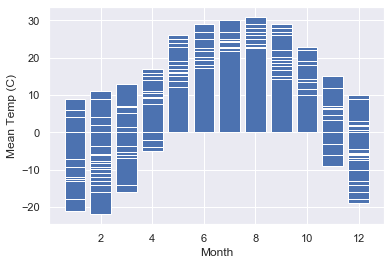

In [15]:
# plot between 2 columns of the new extracted data
plt.bar(Tnum['Month'], Tnum['Mean Temp (C)']) 
plt.xlabel("Month") 
plt.ylabel("Mean Temp (C)") 
plt.show() 

In [16]:
# Get a series of unique values in column 'Age' of the dataframe
#this helps us know the number of unique variable
uniqueValues = Toronto_climate['Year'].unique()
 
print('Unique elements in column "Year" ')
print(uniqueValues)

Unique elements in column "Year" 
['2018' '2017' '2016' '2015' '2014' '2013' '2012' '2011' '2010' '2009'
 '2008' '2007' '2006' '2005' '2004' '2003' '2002' '2001' '2000' '1999'
 '1998' '1997' '1996' '1995' '1994' '1993' '1992' '1991' '1990' '1989'
 '1988' '1987' '1986' '1985' '1984' '1983' '1982' '1981' '1980' '1979'
 '1978' '1977' '1976' '1975' '1974' '1973' '1972' '1971' '1970' '1969'
 '1968' '1967' '1966' '1965' '1964' '1963' '1962' '1961' '1960' '1959'
 '1958' '1957' '1956' '1955' '1954' '1953' '1952' '1951' '1950' '1949'
 '1948' '1947' '1946' '1945' '1944' '1943' '1942' '1941' '1940' '1939'
 '1938' '1937']


In [17]:
#extracted data with just the month of Febuary
Feb_only =  Toronto_climate.loc[Toronto_climate.Month== 2]
Feb_only

,Date,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
231,28-Feb-18,2018,2,28,9.0,16.0,2.0,0.0,0.0,0.0,Winter
232,27-Feb-18,2018,2,27,6.0,14.0,-1.0,0.0,0.0,0.0,Winter
233,26-Feb-18,2018,2,26,3.0,8.0,-1.0,0.0,0.0,0.0,Winter
234,25-Feb-18,2018,2,25,7.0,12.0,1.0,5.0,0.0,5.0,Winter
235,24-Feb-18,2018,2,24,3.0,5.0,1.0,0.0,0.0,0.0,Winter
...,...,...,...,...,...,...,...,...,...,...,...
443,01-Feb-42,1942,2,1,-7.7,-4.3,-11.0,13.0,28.2,41.1,Winter
444,01-Feb-41,1941,2,1,-6.2,-2.6,-9.8,6.4,24.6,31.0,Winter
445,01-Feb-40,1940,2,1,-6.2,-2.2,-10.1,6.9,27.2,34.0,Winter
446,01-Feb-39,1939,2,1,-5.8,-0.5,-11.1,30.2,57.9,88.1,Winter


In [19]:
#creating dataset with just the month of Feb containing first year of each decade over a period of 8 decades
Feb_2018=Feb_only.loc[Feb_only.Year== '2018']
Feb_2008=Feb_only.loc[Feb_only.Year== '2008']
Feb_1998=Feb_only.loc[Feb_only.Year== '1998']
Feb_1988=Feb_only.loc[Feb_only.Year== '1998']
Feb_1978=Feb_only.loc[Feb_only.Year== '1978']
Feb_1968=Feb_only.loc[Feb_only.Year== '1968']
Feb_1958=Feb_only.loc[Feb_only.Year== '1958']
Feb_1948=Feb_only.loc[Feb_only.Year== '1948']
Feb_1938=Feb_only.loc[Feb_only.Year== '1938']

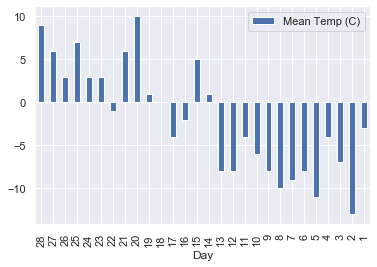

In [20]:
#plot the graph of day vs mean temp for the data Feb_2018
Feb_2018.plot("Day",['Mean Temp (C)'],kind='bar')

In [21]:
#create a new dataset called frame containing first year of each decade over a period of 8 decades
frames = [Feb_2008,Feb_1998,Feb_1988,Feb_1978,Feb_1968,Feb_1958,Feb_1948,Feb_1938]
#concatenate dataframes
df = pd.concat(frames, sort=False)
df

,Date,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
377,01-Feb-08,2008,2,1,-5.3,-1.2,-9.3,30.6,76.8,107.6,Winter
387,01-Feb-98,1998,2,1,-0.3,3.4,-4.0,43.8,1.4,45.8,Winter
387,01-Feb-98,1998,2,1,-0.3,3.4,-4.0,43.8,1.4,45.8,Winter
407,01-Feb-78,1978,2,1,-9.9,-5.3,-14.5,0.0,15.5,9.1,Winter
417,01-Feb-68,1968,2,1,-7.6,-3.0,-12.2,31.0,7.9,37.8,Winter
427,01-Feb-58,1958,2,1,-7.7,-4.1,-11.2,11.2,25.7,36.8,Winter
437,01-Feb-48,1948,2,1,-7.8,-2.7,-12.9,33.5,33.5,67.1,Winter
447,01-Feb-38,1938,2,1,-3.7,0.8,-8.2,63.2,13.2,76.5,Winter


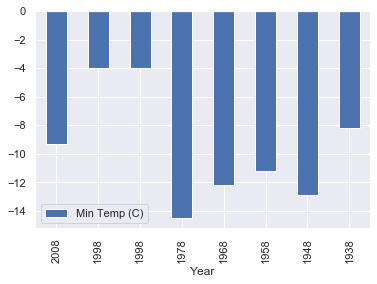

In [22]:
#plot a graph of created dataframe
df.plot("Year",['Min Temp (C)'],kind='bar')

In [23]:
#extracted data with just the month of August
Aug_only =  Toronto_climate.loc[Toronto_climate.Month== 8]
Aug_only

,Date,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
1641,31-Aug-18,2018,8,31,20.0,23.0,16.0,0.0,0.0,0.0,Summer
1642,30-Aug-18,2018,8,30,17.0,19.0,15.0,0.0,0.0,0.0,Summer
1643,29-Aug-18,2018,8,29,23.0,29.0,17.0,0.0,0.0,0.0,Summer
1644,28-Aug-18,2018,8,28,28.0,32.0,24.0,0.0,0.0,0.0,Summer
1645,27-Aug-18,2018,8,27,24.0,29.0,20.0,1.0,0.0,1.0,Summer
...,...,...,...,...,...,...,...,...,...,...,...
1897,01-Aug-42,1942,8,1,19.7,25.7,13.6,28.7,0.0,28.7,Summer
1898,01-Aug-41,1941,8,1,19.5,25.6,13.4,39.4,0.0,39.4,Summer
1899,01-Aug-40,1940,8,1,19.4,25.1,13.6,84.1,0.0,84.1,Summer
1900,01-Aug-39,1939,8,1,21.7,28.7,14.7,51.6,0.0,51.6,Summer


In [24]:
#creating dataset with just the month of Aug containing first year of each decade over a period of 8 decades
Aug_2018=Aug_only.loc[Aug_only.Year== '2018']
Aug_2008=Aug_only.loc[Aug_only.Year== '2008']
Aug_1998=Aug_only.loc[Aug_only.Year== '1998']
Aug_1988=Aug_only.loc[Aug_only.Year== '1998']
Aug_1978=Aug_only.loc[Aug_only.Year== '1978']
Aug_1968=Aug_only.loc[Aug_only.Year== '1968']
Aug_1958=Aug_only.loc[Aug_only.Year== '1958']
Aug_1948=Aug_only.loc[Aug_only.Year== '1948']
Aug_1938=Aug_only.loc[Aug_only.Year== '1938']

In [25]:
#create a new dataset called frame containing first year of each decade over a period of 8 decades
framesA = [Aug_2008,Aug_1998,Aug_1988,Aug_1978,Aug_1968,Aug_1958,Aug_1948,Aug_1938]
#concatenate dataframes
dfA = pd.concat(framesA, sort=False)
dfA

,Date,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
1831,01-Aug-08,2008,8,1,19.7,24.6,14.7,92.6,0.0,92.6,Summer
1841,01-Aug-98,1998,8,1,21.7,27.6,15.7,26.8,0.0,26.8,Summer
1841,01-Aug-98,1998,8,1,21.7,27.6,15.7,26.8,0.0,26.8,Summer
1861,01-Aug-78,1978,8,1,19.7,26.3,13.0,63.6,0.0,63.6,Summer
1871,01-Aug-68,1968,8,1,18.7,25.0,12.4,163.6,0.0,163.6,Summer
1881,01-Aug-58,1958,8,1,20.2,26.6,13.8,69.1,0.0,69.1,Summer
1891,01-Aug-48,1948,8,1,20.9,27.6,14.2,48.5,0.0,48.5,Summer
1901,01-Aug-38,1938,8,1,22.7,29.7,15.6,37.1,0.0,37.1,Summer


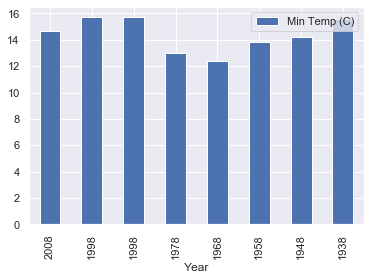

In [26]:
#plot a graph of created dataframe
dfA.plot("Year",['Min Temp (C)'],kind='bar')

In [27]:
#create a new dataset containg both df and dfA
dF = [df,dfA]
#concatenate dataframes
DF = pd.concat(dF, sort=False)
DF

,Date,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
377,01-Feb-08,2008,2,1,-5.3,-1.2,-9.3,30.6,76.8,107.6,Winter
387,01-Feb-98,1998,2,1,-0.3,3.4,-4.0,43.8,1.4,45.8,Winter
387,01-Feb-98,1998,2,1,-0.3,3.4,-4.0,43.8,1.4,45.8,Winter
407,01-Feb-78,1978,2,1,-9.9,-5.3,-14.5,0.0,15.5,9.1,Winter
417,01-Feb-68,1968,2,1,-7.6,-3.0,-12.2,31.0,7.9,37.8,Winter
427,01-Feb-58,1958,2,1,-7.7,-4.1,-11.2,11.2,25.7,36.8,Winter
437,01-Feb-48,1948,2,1,-7.8,-2.7,-12.9,33.5,33.5,67.1,Winter
447,01-Feb-38,1938,2,1,-3.7,0.8,-8.2,63.2,13.2,76.5,Winter
1831,01-Aug-08,2008,8,1,19.7,24.6,14.7,92.6,0.0,92.6,Summer
1841,01-Aug-98,1998,8,1,21.7,27.6,15.7,26.8,0.0,26.8,Summer


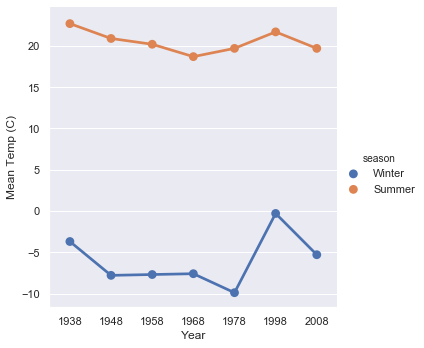

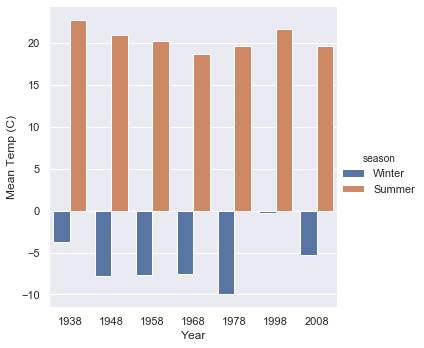

In [28]:
#checking if there is a relationship between winter and summer season
sns.catplot(x="Year", y="Mean Temp (C)", hue="season", kind="point", data=DF);
sns.catplot(x="Year", y="Mean Temp (C)", hue="season", kind="bar", data=DF);

In [29]:
#create a dataset containg just feb 2018 and aug 2018
Main = [Feb_2018,Aug_2018]
#concatenate dataframes
Main_Feb = pd.concat(Main, sort=False)
Main_Feb

,Date,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
231,28-Feb-18,2018,2,28,9.0,16.0,2.0,0.0,0.0,0.0,Winter
232,27-Feb-18,2018,2,27,6.0,14.0,-1.0,0.0,0.0,0.0,Winter
233,26-Feb-18,2018,2,26,3.0,8.0,-1.0,0.0,0.0,0.0,Winter
234,25-Feb-18,2018,2,25,7.0,12.0,1.0,5.0,0.0,5.0,Winter
235,24-Feb-18,2018,2,24,3.0,5.0,1.0,0.0,0.0,0.0,Winter
236,23-Feb-18,2018,2,23,3.0,6.0,-1.0,3.0,0.0,3.0,Winter
237,22-Feb-18,2018,2,22,-1.0,2.0,-3.0,0.0,0.0,0.0,Winter
238,21-Feb-18,2018,2,21,6.0,15.0,-2.0,8.0,0.0,8.0,Winter
239,20-Feb-18,2018,2,20,10.0,17.0,3.0,8.0,0.0,8.0,Winter
240,19-Feb-18,2018,2,19,1.0,4.0,-3.0,13.0,0.0,13.0,Winter


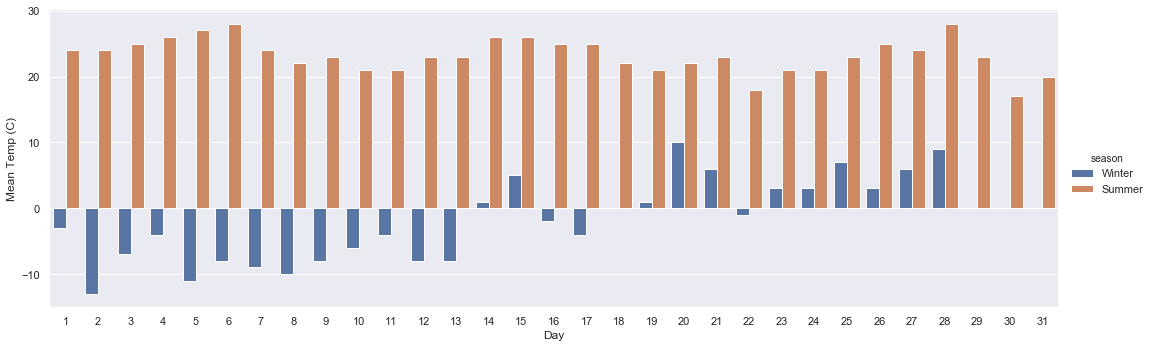

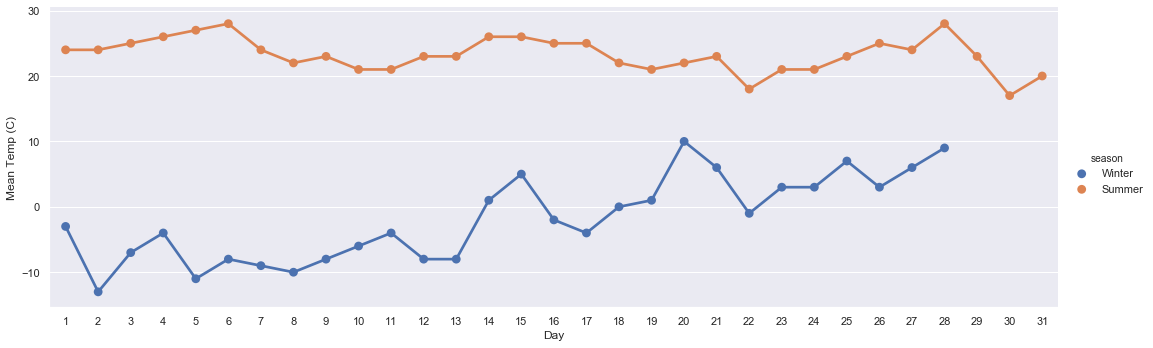

In [30]:
#plot 2 different type of  graph for created dataframe
sns.catplot(
    data=Main_Feb,
    x='Day',
    y='Mean Temp (C)',
    hue='season',
    kind='bar',
    height=5, # make the plot 5 units high
    aspect=3) 

sns.catplot(
    data=Main_Feb,
    x='Day',
    y='Mean Temp (C)',
    hue='season',
    kind='point',
    height=5, # make the plot 5 units high
    aspect=3) 

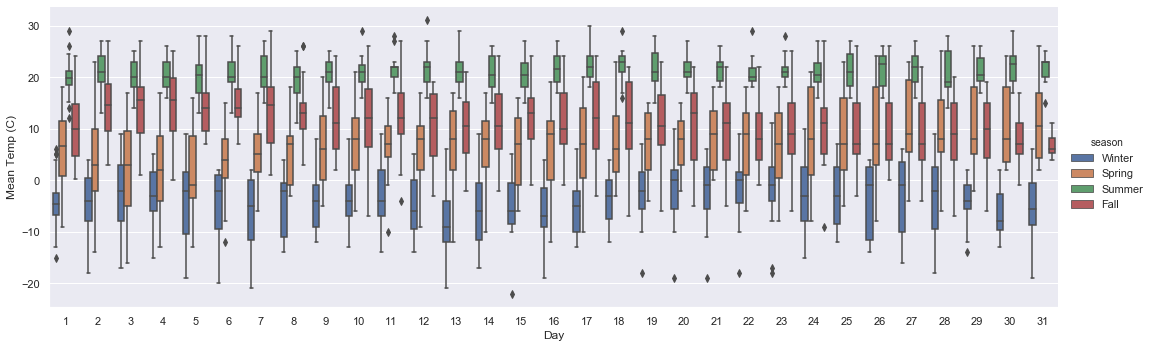

In [31]:
#plot boxplot of created dataframe
sns.catplot(
    data=Toronto_climate,
    x='Day',
    y='Mean Temp (C)',
    hue='season',
    kind='box',
    height=5, # make the plot 5 units high
    aspect=3)

In [32]:
# get a general description 
Feb_only.describe()

,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
count,217.0,217.000000,217.000000,217.000000,217.000000,214.000000,217.000000,214.000000
mean,2.0,9.838710,-5.149770,-0.897235,-9.347005,8.475701,10.240092,18.496262
std,0.0,9.249964,5.985941,6.170539,6.157561,14.699400,15.858194,26.717628
min,2.0,1.000000,-22.000000,-19.000000,-26.000000,0.000000,0.000000,0.000000
25%,2.0,1.000000,-8.700000,-4.000000,-13.000000,0.000000,0.000000,0.000000
50%,2.0,7.000000,-5.300000,-1.000000,-9.300000,0.000000,1.000000,2.000000
75%,2.0,18.000000,-1.900000,2.000000,-5.500000,12.000000,16.500000,31.750000
max,2.0,29.000000,11.000000,18.000000,4.000000,63.200000,76.800000,107.600000


In [ ]:
#LOGISTIC REGRESSION TO PREDICT A PARTICULAR SEASON IF ALL OTHER 
#VARIABLE [Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),] ARE GIVEN

In [33]:
#dealing with missing values 
#get a new copy of dataset
data=Toronto_climate

In [34]:
#Apply the drop() functon to the new dataset also assign it to a newname 
dataset=data.drop('Date',axis=1)
dataset

,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
0,2018,1,31,-7.0,2.0,-15.0,0.0,1.0,1.0,Winter
1,2018,1,30,-11.0,-7.0,-15.0,0.0,0.0,0.0,Winter
2,2018,1,29,-4.0,-2.0,-7.0,0.0,5.0,5.0,Winter
3,2018,1,28,1.0,5.0,-3.0,0.0,0.0,0.0,Winter
4,2018,1,27,5.0,10.0,0.0,2.0,0.0,2.0,Winter
...,...,...,...,...,...,...,...,...,...,...
2884,1941,12,1,-1.5,1.9,-4.8,24.9,16.3,41.1,Winter
2885,1940,12,1,-3.6,0.6,-7.7,68.1,14.5,82.6,Winter
2886,1939,12,1,NaN,NaN,NaN,NaN,NaN,NaN,Winter
2887,1938,12,1,-2.5,1.1,-6.1,13.7,13.7,27.4,Winter


In [35]:
# fill missing values with mean column values using fillna() function
dataset.fillna(data.mean(), inplace=True)
# count the number of NaN values in each column

In [36]:
#get the number of missing values
dataset.isnull().sum()

Year                 0
Month                0
Day                  0
Mean Temp (C)        0
Max Temp (C)         0
Min Temp (C)         0
Total Rain (mm)      0
Total Snow (cm)      0
Total Precip (mm)    0
season               0
dtype: int64

In [37]:
dataset.values

array([['2018', 1, 31, ..., 1.0, 1.0, 'Winter'],
       ['2018', 1, 30, ..., 0.0, 0.0, 'Winter'],
       ['2018', 1, 29, ..., 5.0, 5.0, 'Winter'],
       ...,
       ['1939', 12, 1, ..., 3.4119122257053287, 21.84949389179755,
        'Winter'],
       ['1938', 12, 1, ..., 13.7, 27.4, 'Winter'],
       ['1937', 12, 1, ..., 33.8, 41.4, 'Winter']], dtype=object)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [46]:
#Assign values to X and Y
x = dataset.iloc[:, 0:8].values
y= dataset.iloc[:, 9].values
X_train, x_test, y_train, y_test = train_test_split(
                                    x,y,random_state=0)

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import roc_auc_score,roc_curve

In [47]:

#preprocessing
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)


In [78]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
#training the model
model = LogisticRegression()
model.fit(X_train,y_train)
model.intercept_
model.coef_

array([[-6.6667e-02,  4.1855e+00,  4.4929e-02,  8.5017e-01,  8.7209e-01,
        -6.3987e-01,  1.7424e-01, -1.3528e+00],
       [-7.9023e-02, -1.8560e+00,  1.7010e-02,  5.1866e-01,  7.7987e-01,
        -8.3381e-01,  2.0285e-01, -4.0362e-01],
       [-3.3337e-01, -1.5884e+00, -2.2616e-01,  1.8227e+00,  6.8376e-02,
         3.2235e+00, -6.4671e-04,  8.1105e-02],
       [ 2.1630e-01, -1.3511e-02,  2.4641e-02, -1.4402e+00, -1.8580e+00,
         2.5862e-01, -2.3566e-01,  3.9248e-01]])

In [81]:
#test the model
X_test = sc.transform(x_test)
y_pred = model.predict(x_test) 

In [83]:
#performance measures
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred, pos_label=1, average='weighted')
tpr = recall_score(y_test,y_pred, pos_label=1, average='weighted')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Fall       0.77      0.85      0.81       176
      Spring       0.82      0.61      0.70       201
      Summer       0.80      0.97      0.88       173
      Winter       0.63      0.61      0.62       173

    accuracy                           0.76       723
   macro avg       0.75      0.76      0.75       723
weighted avg       0.76      0.76      0.75       723



In [85]:
dataset.corr()

,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
Month,1.000000,0.017534,0.311438,0.284025,0.334788,0.061993,-0.167108,0.009452
Day,0.017534,1.000000,0.070130,0.056182,0.084922,-0.521634,-0.322232,-0.574432
Mean Temp (C),0.311438,0.070130,1.000000,0.991707,0.989468,0.119951,-0.395616,0.002719
Max Temp (C),0.284025,0.056182,0.991707,1.000000,0.964119,0.128718,-0.388382,0.012719
Min Temp (C),0.334788,0.084922,0.989468,0.964119,1.000000,0.108339,-0.395130,-0.007769
Total Rain (mm),0.061993,-0.521634,0.119951,0.128718,0.108339,1.000000,0.105001,0.960279
Total Snow (cm),-0.167108,-0.322232,-0.395616,-0.388382,-0.395130,0.105001,1.000000,0.373426
Total Precip (mm),0.009452,-0.574432,0.002719,0.012719,-0.007769,0.960279,0.373426,1.000000


In [124]:
import statsmodels.api as sm

In [125]:
print(mod1res.summary())

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_train_prob = knn.predict_proba(X_train)
y_pred_prob = knn.predict_proba(X_test)

In [96]:
tpr = [0.0]  # true positive rate
fpr = [0.0]  # false positive rate
nractives = len(x)
nrdecoys = len(y) - len(x)


In [55]:
#Accuracy of regression
y_pred =  classifier.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format( classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


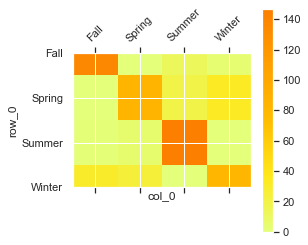

In [56]:
#plot of confusion matrix
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.Wistia):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

In [57]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Fall       0.81      0.90      0.85       152
      Spring       0.73      0.61      0.67       135
      Summer       0.83      0.96      0.89       153
      Winter       0.69      0.59      0.64       138

    accuracy                           0.78       578
   macro avg       0.77      0.77      0.76       578
weighted avg       0.77      0.78      0.77       578



In [103]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

In [108]:
model.predict_proba(x)

array([[1.0231e-056, 4.7720e-067, 0.0000e+000, 1.0000e+000],
       [4.9241e-061, 7.8948e-071, 0.0000e+000, 1.0000e+000],
       [9.7819e-062, 2.4365e-071, 0.0000e+000, 1.0000e+000],
       ...,
       [4.7319e-030, 1.3218e-071, 4.5008e-278, 1.0000e+000],
       [1.4417e-042, 6.3478e-077, 2.4863e-301, 1.0000e+000],
       [3.8678e-055, 9.7106e-081, 8.6388e-306, 1.0000e+000]])

In [109]:
model.predict(x)

array(['Winter', 'Winter', 'Winter', ..., 'Winter', 'Winter', 'Winter'],
      dtype=object)

In [110]:
model.score(x, y)

0.2350294219453098

In [111]:
confusion_matrix(y, model.predict(x))

array([[  0,   0,   0, 756],
       [  0,   0,   0, 688],
       [  0,   0,   0, 766],
       [  0,   0,   0, 679]], dtype=int64)

In [126]:
print(model.summary())

AttributeError: 'LogisticRegression' object has no attribute 'summary'

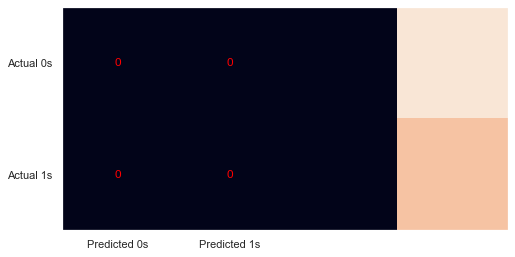

In [112]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [113]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
model.score(x, y)

0.7895465559016961

In [116]:
confusion_matrix(y, model.predict(x))

array([[663,   0,  52,  41],
       [  0, 443,  86, 159],
       [ 11,  12, 743,   0],
       [129, 118,   0, 432]], dtype=int64)

In [118]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

        Fall       0.83      0.88      0.85       756
      Spring       0.77      0.64      0.70       688
      Summer       0.84      0.97      0.90       766
      Winter       0.68      0.64      0.66       679

    accuracy                           0.79      2889
   macro avg       0.78      0.78      0.78      2889
weighted avg       0.78      0.79      0.78      2889



In [127]:
ax = sns.heatmap(dataset)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [120]:
df_cm = pd.DataFrame(dataset, index = [i for i in "ABCDEFGHIJK"],
                  columns = [i for i in "ABCDEFGHIJK"])

In [129]:
ax = sns.heatmap(dataset, vmin=0, vmax=1)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        Fall       0.58      1.00      0.73       176
      Spring       0.56      0.65      0.60       201
      Summer       0.64      0.65      0.64       173
      Winter       0.25      0.01      0.02       173

    accuracy                           0.58       723
   macro avg       0.51      0.58      0.50       723
weighted avg       0.51      0.58      0.50       723



In [ ]:
#LINEAR REGRESSION to predict Total Precip from Month, Day and Mean Temp

Text(0.5, 1.03, 'Total Precip (mm) vs. Month, Day, and Mean Temp (C)')

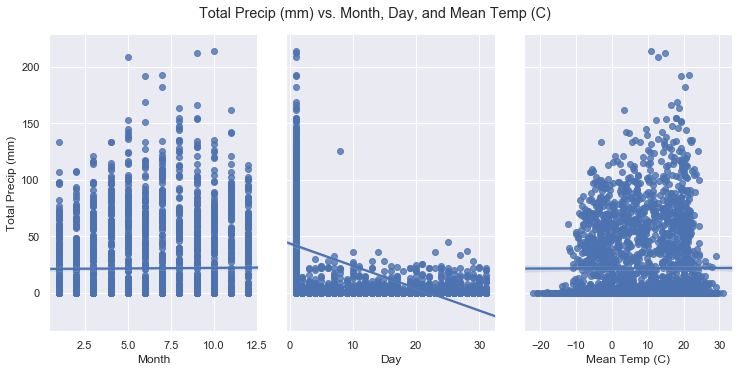

In [58]:

# Pairs plot visualizing the relationships between our three selected predictors and the response

ax_3pairs = sns.pairplot(NT, x_vars=['Month','Day','Mean Temp (C)'], 
                         y_vars='Total Precip (mm)', height=5, aspect=0.7, kind='reg')

ax_3pairs.fig.suptitle('Total Precip (mm) vs. Month, Day, and Mean Temp (C)', y=1.03)

Text(0.5, 1.0, 'Total Precip (mm) vs. Month')

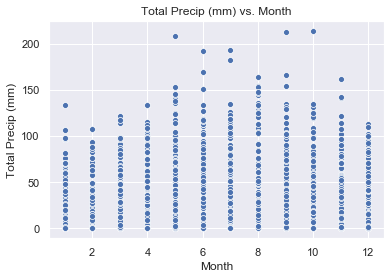

In [59]:
# Scatter plot for the relationship between Total Precip and Month
ax_scatter = sns.scatterplot(NT['Month'], Toronto_climate['Total Precip (mm)'])
ax_scatter.set_title("Total Precip (mm) vs. Month")

Text(0.5, 1.0, 'Total Precip (mm) vs. Day Residual Plot')

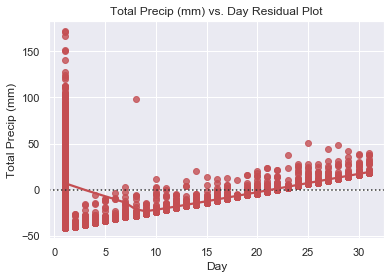

In [60]:
# Residual plot between Calories and Rating
ax_residual = sns.residplot(NT['Day'], NT['Total Precip (mm)'], lowess=True, color="r")
ax_residual.set_title("Total Precip (mm) vs. Day Residual Plot")

In [61]:
#x is the predictor variable for the response variable y
import scipy
scipy.stats.linregress(NT['Total Precip (mm)'], NT['Day'])

LinregressResult(slope=-0.16656092644292483, intercept=14.74069112111236, rvalue=-0.5744321275871905, pvalue=2.3826479441969926e-253, stderr=0.0044173051629739285)